In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  

In [2]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## Encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [13]:
# divide the dependent or independent features
x = df.drop("FWI",axis = 1)
y = df['FWI']

In [14]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [15]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [16]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)  

In [17]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((194, 11), (49, 11), (194,), (49,))

In [18]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

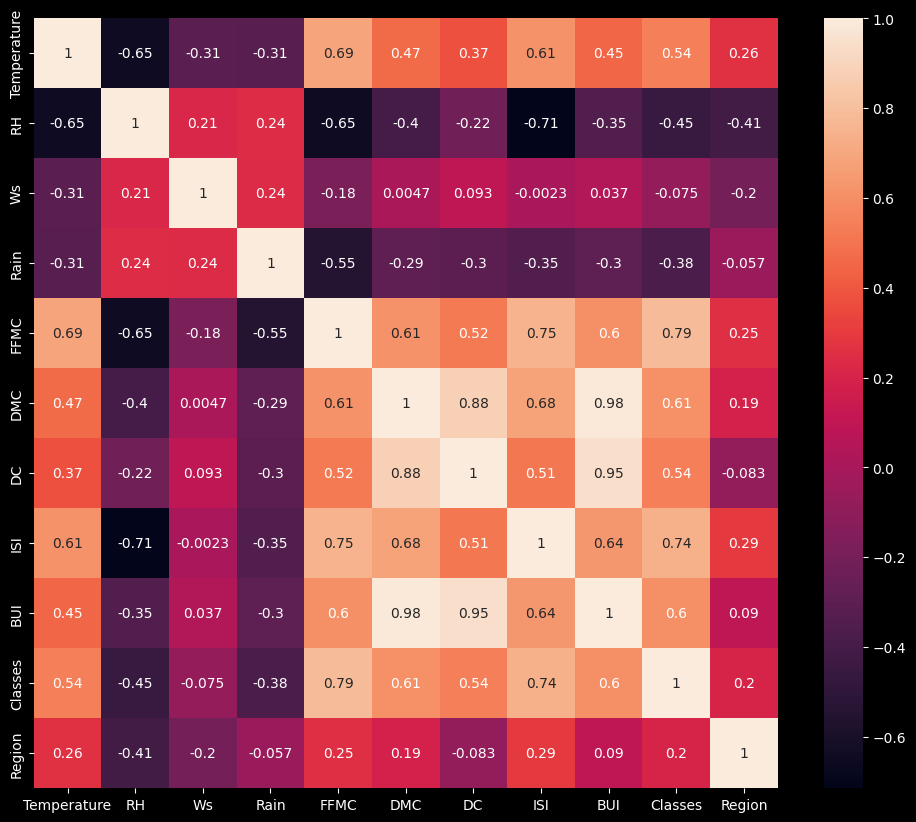

In [20]:
# to check for Multucollibearity
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr,annot=True)

In [21]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[j]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(x_train, 0.85)

In [23]:
corr_features

{'DC', 'DMC'}

In [24]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape , x_test.shape

((194, 9), (49, 9))

# feature scaling or Standardization


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
x_train_scaled

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.76790976,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  3.10086694,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.24276653,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.03380506,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.14278167,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.99392076,
        -1.14434427, -1.01036297]])

# box plots to understand Effect of Standard Scaler

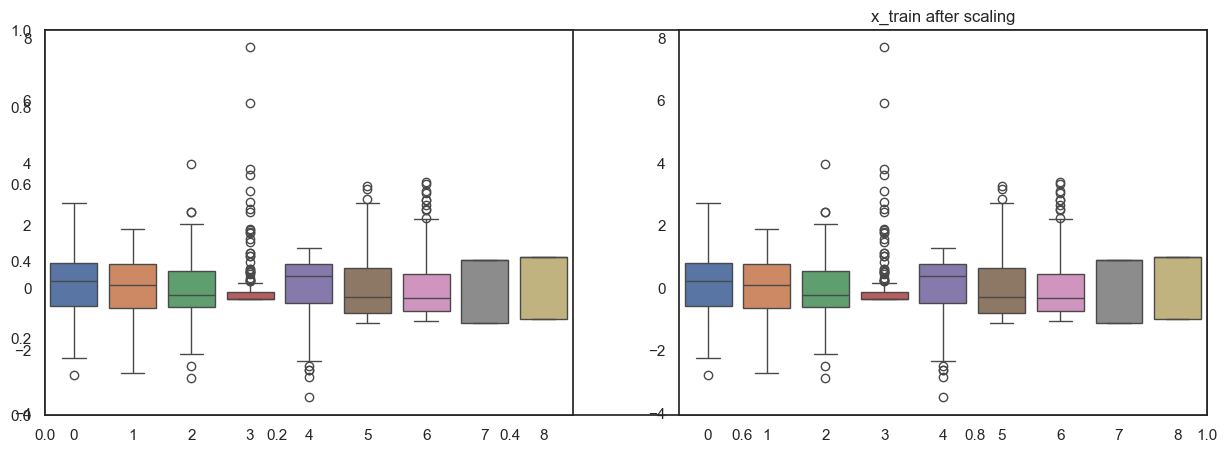

In [31]:
plt.style.use('default')  # removes dark background
sns.set_theme(style="white")  # clean white style

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)

plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scaling')
plt.show()


Mean_absolute_error :  0.434243011549862
R2 score :  0.988274860368252


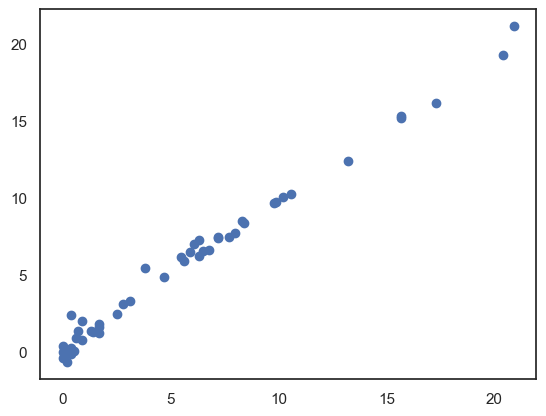

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(x_train_scaled , y_train)
y_pred = linreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score =  r2_score(y_test,y_pred)

print("Mean_absolute_error : ",mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred )


Mean_absolute_error :  0.8985617333078111
R2 score :  0.9584664765323243


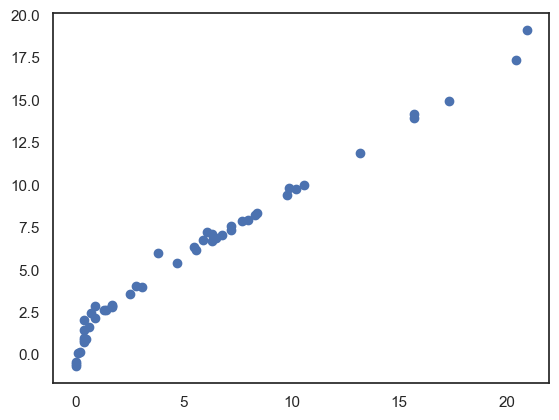

In [36]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(x_train_scaled , y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score =  r2_score(y_test,y_pred)

print("Mean_absolute_error : ",mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred )


# Cross validation Lasso

In [38]:
from sklearn.linear_model import LassoCV
lassocv =  LassoCV(cv = 5)
lassocv.fit(x_train_scaled , y_train)



LassoCV(cv=5)

In [39]:
lassocv.alpha_

0.05048675230866522

In [40]:
lassocv.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

In [41]:
lassocv.mse_path_

array([[68.58934997, 64.28650232, 50.23335797, 79.11474083, 38.68688171],
       [63.2664675 , 58.77362304, 43.17939191, 77.07183352, 34.66910628],
       [56.87389457, 52.48941688, 37.11446038, 69.4806422 , 31.16497557],
       [51.2737596 , 46.2483595 , 31.92486848, 62.80993539, 28.10823885],
       [46.21961304, 40.7712715 , 27.4911562 , 56.94442062, 24.79353437],
       [40.65106115, 35.98384727, 23.70899878, 51.18184218, 21.33535202],
       [35.78736232, 31.79836598, 20.48914165, 45.18963662, 18.35472744],
       [31.53799628, 28.13763443, 17.75335115, 39.94561169, 15.78776954],
       [27.82423746, 24.93467918, 15.43421801, 35.35446388, 13.57882248],
       [24.57725865, 22.13115749, 13.47340695, 31.33318814, 11.67966022],
       [21.73792053, 19.67587495, 11.82020522, 27.80945389, 10.04844572],
       [19.25390874, 17.52531149, 10.43153381, 24.71992579,  8.64889149],
       [17.07991881, 15.64046041,  9.26936513, 22.0102866 ,  7.44953002],
       [15.17648151, 13.98768278,  8.3

Mean_absolute_error :  0.420524454410756
R2 score :  0.9887202239815966


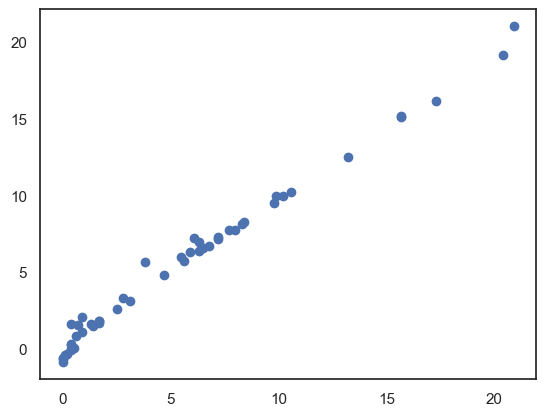

In [42]:
y_pred = lassocv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score =  r2_score(y_test,y_pred)

print("Mean_absolute_error : ",mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred )

 # Ridge Regression with RidgeCV

Mean_absolute_error :  0.4439339300881584
R2 score :  0.9880130956495159


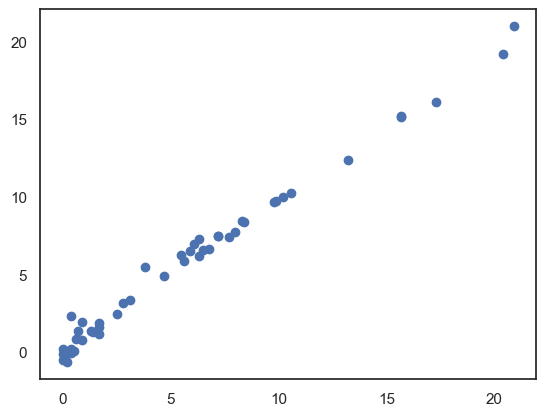

In [43]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
ridge = Ridge()
ridge.fit(x_train_scaled , y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score =  r2_score(y_test,y_pred)

print("Mean_absolute_error : ",mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred )

Mean_absolute_error :  0.4439339300881584
R2 score :  0.9880130956495159


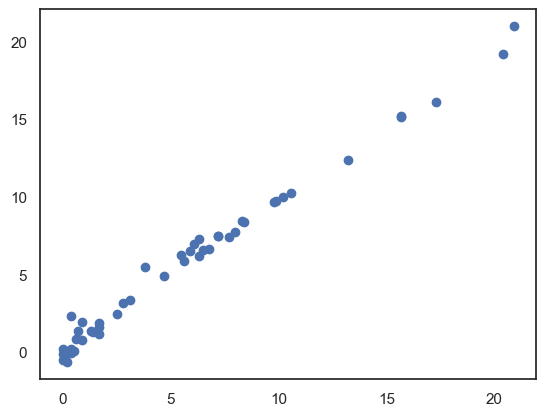

In [44]:
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(x_train_scaled , y_train)
y_pred = ridgecv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score =  r2_score(y_test,y_pred)

print("Mean_absolute_error : ",mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred )

In [45]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# Elasticnet Regression with ElasticNetCV

Mean_absolute_error :  1.6463621150999614
R2 score :  0.8753977798367691


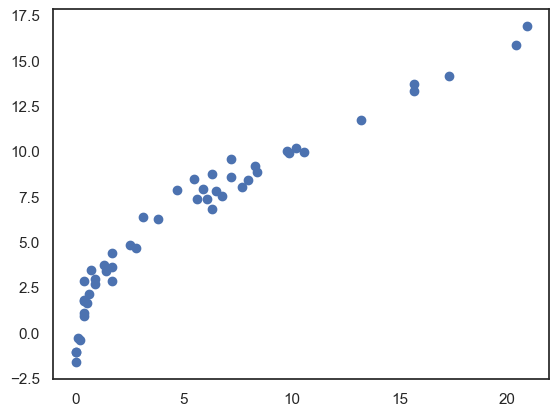

In [46]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred = elastic.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score =  r2_score(y_test,y_pred)

print("Mean_absolute_error : ",mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred )


Mean_absolute_error :  0.46281506745033785
R2 score :  0.9876041500605405


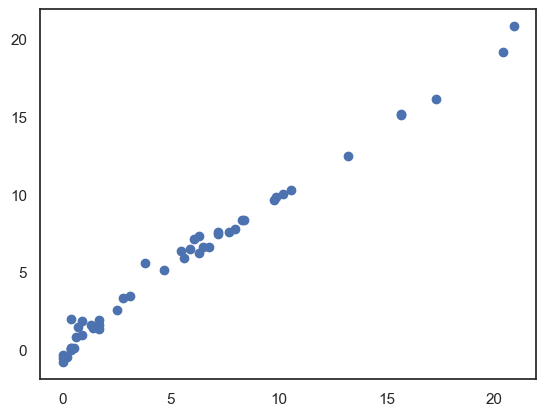

In [47]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV()
elasticcv.fit(x_train_scaled,y_train)
y_pred = elasticcv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score =  r2_score(y_test,y_pred)

print("Mean_absolute_error : ",mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred )

In [48]:
elasticcv.alphas_

array([14.31273339, 13.34810307, 12.44848559, 11.60949933, 10.82705793,
       10.09735046,  9.41682284,  8.78216049,  8.19027227,  7.63827533,
        7.12348114,  6.64338235,  6.19564061,  5.77807517,  5.38865224,
        5.02547512,  4.68677492,  4.37090197,  4.07631781,  3.80158763,
        3.54537335,  3.30642705,  3.08358493,  2.87576163,  2.68194492,
        2.50119081,  2.33261892,  2.17540821,  2.02879298,  1.89205912,
        1.76454067,  1.64561653,  1.53470749,  1.43127334,  1.33481031,
        1.24484856,  1.16094993,  1.08270579,  1.00973505,  0.94168228,
        0.87821605,  0.81902723,  0.76382753,  0.71234811,  0.66433823,
        0.61956406,  0.57780752,  0.53886522,  0.50254751,  0.46867749,
        0.4370902 ,  0.40763178,  0.38015876,  0.35453733,  0.33064271,
        0.30835849,  0.28757616,  0.26819449,  0.25011908,  0.23326189,
        0.21754082,  0.2028793 ,  0.18920591,  0.17645407,  0.16456165,
        0.15347075,  0.14312733,  0.13348103,  0.12448486,  0.11

# pickle the machine learning model, preprocessing model 

In [49]:
scaler

StandardScaler()

In [50]:
ridge

Ridge()

In [51]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))